# Project: Investigating a TMDB movie database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Overview**
Due to my great interest in movies, I have chosen to work with the TMDB database. This database has information on approximately 10 K movies and has 21 columns that consider income, budget, cast, movie title, genres, etc.

**Questions to be answered in this report**
1. Which is the most profitable movie?
2. Which is the most profitable actor/actress?
3. Is the movie profit related to the TMDB vote average?
4. Which genre is the most profitable?

**We should answer which genre and actor/actress are the most profitable to make a movie
also if a good script guarantee high movie profits**

**Packages imported are:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Loading the data from CSV

In [2]:
df = pd.read_csv('/Users/Robotongo/Desktop/udacity/imdb/dataset/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


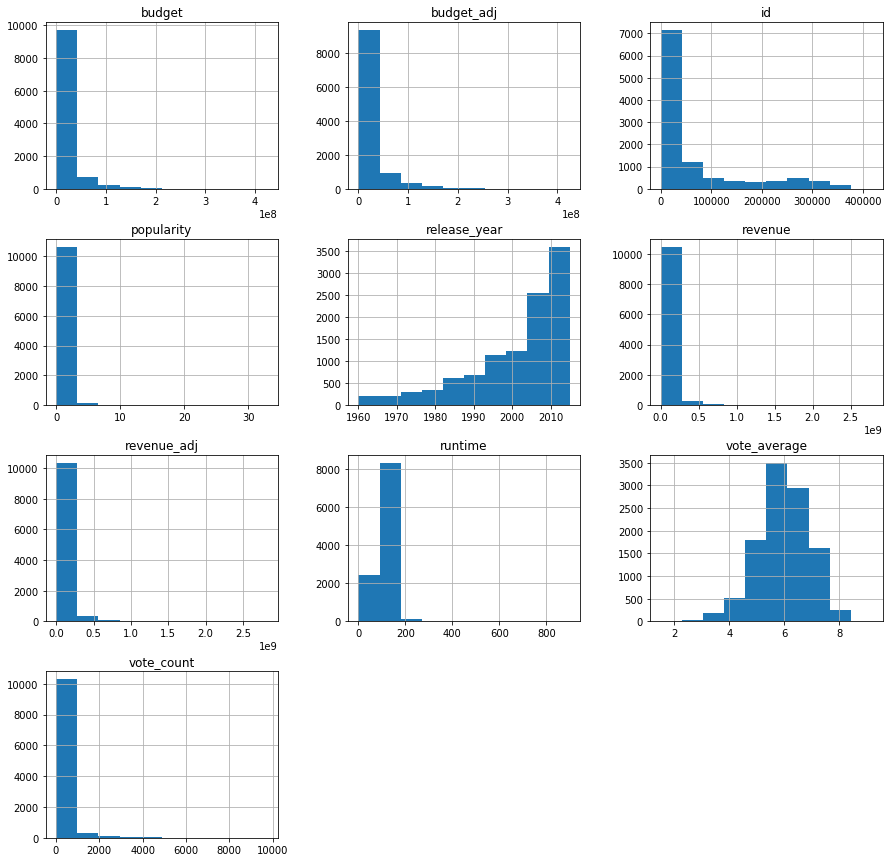

In [6]:
df.hist(figsize=(15,15));

## Observations about columns

Based on the questions asked, we will need to:

General observations:

>- The dataset has duplicate rows. I'll drop them to get results.
- According to the df.info() table some columns have a lot of Zero values, so they will be dropped. That's the case of:
>>  
    - budget 
    - revenue 
    - budget_adj 
    - revenue_adj 
    - runtime

- Some columns has scientific numbers notation, I'll change them to float for better interpretation.

Column observations:


>Some cuantitative columns I assume are in dollars:
- budget
- revenue
- budget_adj
- revenue_adj

>Standard error is high, many movies have zero values, that's the case of:
- vote_count
- vote_average

>Some columns have many values separated by an "|". So I'll split them into multiple columns. These columns are:
- cast
- director
- keywords
- genres
- production_companies




## Scientific notation --> float

In [7]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

pd.options.display.float_format = '{:.1f}'.format

# Data cleaning

1. Columns deleted:
> id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keyword, overview, vote_count, vote_average

In [8]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
#First, the following list considers the columns to be deleted
columns_deleted = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj']

#Second, deleting the columns from df with columns_deleted
df = df.drop(columns_deleted, 1)

df.head()

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


2. Deleting duplicated rows

In [9]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates(keep='first', inplace=True)

df.shape

(10865, 16)

In [10]:
#I use this to know how many nonzero values have every column
#https://www.geeksforgeeks.org/display-scientific-notation-as-float-in-python/
df.astype(bool).sum(axis=0)

budget                   5169
revenue                  4849
original_title          10865
cast                    10865
homepage                10865
director                10865
tagline                 10865
keywords                10865
overview                10865
runtime                 10834
genres                  10865
production_companies    10865
release_date            10865
vote_count              10865
vote_average            10865
release_year            10865
dtype: int64

In [11]:
#https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column
boolean = df.duplicated(subset=['original_title']).any()
print(boolean)

True


In [12]:
#Check how many duplicated 'original title' exist, to know how many movies are duplicated
df.duplicated(subset=['original_title']).sum()

294

## Column Description


budget                : I assume it's in dollars, many movies have zero values.

budget                : I assume it's in dollars, many movies have zero values.

vote_count            : Standard error is high, so I can't assume that a highly ranked movie is better than others.

vote_average          : Same that "vote_count" column.

budget_adj            : I assume it's in dollars, many rows have zero values, I turn them into a float number.

revenue_adj           : I assume it's in dollars, many rows have zero values, I turn them into a float number.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning: dealing with 0, NaN and Duplicates values

Dealing with zeros and NaN values

In [13]:
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)


df.dropna(axis=0, inplace=True)

Split columns with multiple values

In [14]:
#https://stackoverflow.com/questions/23317342/pandas-dataframe-split-column-into-multiple-columns-right-align-inconsistent-c

#df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast{x+1}"))
#df_c.head()

#df = df.join(df['cast'].str.split('|', expand=True).add_prefix('cast'))
df = df.join(df['production_companies'].str.split('|', expand=True).add_prefix('p_comp'))
df = df.join(df['genres'].str.split('|', expand=True).add_prefix('genre'))
df = df.join(df['cast'].str.split('|', expand=True).add_prefix('cast'))
df.head()

,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,...,genre0,genre1,genre2,genre3,genre4,cast0,cast1,cast2,cast3,cast4
0,150000000.0,1513528810.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124.0,...,Action,Adventure,Science Fiction,Thriller,None,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,150000000.0,378436354.0,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120.0,...,Action,Adventure,Science Fiction,Thriller,None,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,110000000.0,295238201.0,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119.0,...,Adventure,Science Fiction,Thriller,None,None,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,200000000.0,2068178225.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136.0,...,Action,Adventure,Science Fiction,Fantasy,None,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,190000000.0,1506249360.0,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137.0,...,Action,Crime,Thriller,None,None,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


<a id='eda'></a>
## Exploratory Data Analysis

Approach to analyzing data set to main characters, in order to answer formulated questions.

### 1. Which is the most profitable movie?

In [15]:
#profit = revenue - budget

df.insert(2, 'profit', df['revenue']-df['budget'])


In [16]:
df['profit_rank'] = df['profit'].rank(ascending=1)
df = df.set_index('profit_rank')
df = df.sort_index()
df.tail()

,budget,revenue,profit,original_title,cast,homepage,director,tagline,keywords,overview,...,genre0,genre1,genre2,genre3,genre4,cast0,cast1,cast2,cast3,cast4
profit_rank,,,,,,,,,,,,,,,,,,,,,
1283.0,190000000.0,1506249360.0,1316249360.0,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,...,Action,Crime,Thriller,None,None,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson
1284.0,150000000.0,1513528810.0,1363528810.0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,...,Action,Adventure,Science Fiction,Thriller,None,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1285.0,200000000.0,1845034188.0,1645034188.0,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,shipwreck|iceberg|ship|panic|titanic,"84 years later, a 101-year-old woman named Ros...",...,Drama,Romance,Thriller,None,None,Kate Winslet,Leonardo DiCaprio,Frances Fisher,Billy Zane,Kathy Bates
1286.0,200000000.0,2068178225.0,1868178225.0,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,...,Action,Adventure,Science Fiction,Fantasy,None,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
1287.0,237000000.0,2781505847.0,2544505847.0,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,culture clash|future|space war|space colony|so...,"In the 22nd century, a paraplegic Marine is di...",...,Action,Adventure,Fantasy,Science Fiction,None,Sam Worthington,Zoe Saldana,Sigourney Weaver,Stephen Lang,Michelle Rodriguez


Most profitable movie is **Avatar**

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

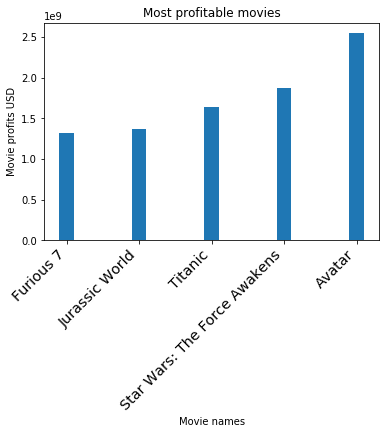

In [25]:
height = df['profit'].tail(5)
bars = df['original_title'].tail(5)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height,.2)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Most profitable movies')
plt.xlabel("Movie names")
plt.ylabel('Movie profits USD')

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)



In [18]:
df.head(3)

,budget,revenue,profit,original_title,cast,homepage,director,tagline,keywords,overview,...,genre0,genre1,genre2,genre3,genre4,cast0,cast1,cast2,cast3,cast4
profit_rank,,,,,,,,,,,,,,,,,,,,,
1.0,425000000.0,11087569.0,-413912431.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,assassin|small town|revenge|deception|super speed,An Asian assassin (Dong-gun Jang) is forced to...,...,Adventure,Fantasy,Action,Western,Thriller,Kate Bosworth,Jang Dong-gun,Geoffrey Rush,Danny Huston,Ti Lung
2.0,255000000.0,89289910.0,-165710090.0,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,http://disney.go.com/the-lone-ranger/,Gore Verbinski,Never Take Off the Mask,texas|horse|survivor|texas ranger|partner,The Texas Rangers chase down a gang of outlaws...,...,Action,Adventure,Western,None,None,Johnny Depp,Armie Hammer,William Fichtner,Helena Bonham Carter,James Badge Dale
3.0,150000000.0,38992758.0,-111007242.0,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,http://disney.go.com/disneypictures/marsneedsm...,Simon Wells,Mom needs a little space.,boy|alien|rescue|martian|alien abduction,"When Martians suddenly abduct his mom, mischie...",...,Adventure,Animation,Family,None,None,Seth Green,Joan Cusack,Dan Fogler,Breckin Meyer,Elisabeth Harnois


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

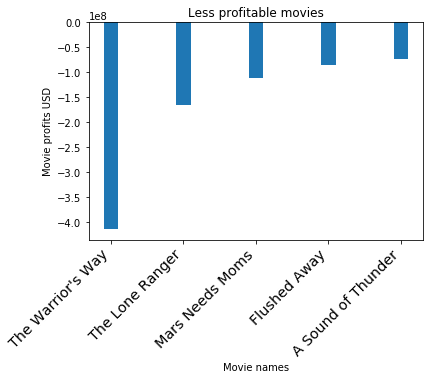

In [26]:
height = df['profit'].head(5)
bars = df['original_title'].head(5)
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height,.2)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)

plt.title('Less profitable movies')
plt.xlabel("Movie names")
plt.ylabel('Movie profits USD')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)


And the less profitable movie is **The Warrior's Way**.

### 2. Which is the most profitable actor/actress?
Assumption: the first actor/actress in the column "cast" is the protagonist of the movie.

In [20]:
df.groupby(['cast0'])['profit'].sum().sort_values(ascending=False).head(10)

cast0
Daniel Radcliffe    5083469421.0
Robert Downey Jr.   4958224449.0
Harrison Ford       3577680705.0
Tom Hanks           3259357249.0
Tom Cruise          3075708848.0
Johnny Depp         3051855508.0
Sam Worthington     2807440175.0
Elijah Wood         2666649139.0
Mike Myers          2634259979.0
Christian Bale      2626156585.0
Name: profit, dtype: float64

Top 3 profitable Actors/actress are: **Daniel Redcliffe, Robert Downey Jr. and Harrison Ford.**

### 3. Is the movie profit related to the TMDB vote average?

In [21]:
df.corr()

,budget,revenue,profit,runtime,vote_count,vote_average,release_year
budget,1.0,0.7,0.6,0.3,0.6,0.1,0.2
revenue,0.7,1.0,1.0,0.4,0.8,0.3,0.0
profit,0.6,1.0,1.0,0.3,0.8,0.3,-0.0
runtime,0.3,0.4,0.3,1.0,0.4,0.4,-0.1
vote_count,0.6,0.8,0.8,0.4,1.0,0.5,0.1
vote_average,0.1,0.3,0.3,0.4,0.5,1.0,-0.2
release_year,0.2,0.0,-0.0,-0.1,0.1,-0.2,1.0


Exist a strong correlation between vote_count and profit. So, exist a high probability that an expensive movie may be qualified good.

Text(0, 0.5, 'Vote average')

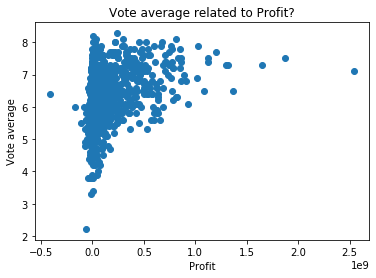

In [22]:
plt.scatter(df['profit'],df['vote_average'])
plt.title('Vote average related to Profit?')
plt.xlabel("Profit")
plt.ylabel('Vote average')

The Vote Average is low related to the Movie Profits... sadly.

### 4. Which genre is the most profitable?

In [23]:
print(df.groupby(['genre0'])['profit'].agg('sum').sort_values(ascending=False))

genre0
Action            38373567885.0
Adventure         34761674090.0
Drama             18811901847.0
Comedy            15505825325.0
Animation         14727382356.0
Science Fiction    8402227756.0
Fantasy            7709055676.0
Horror             4749068424.0
Thriller           4408001729.0
Family             4401684619.0
Crime              2944540206.0
Romance            2328330222.0
War                1051802680.0
History             582792580.0
Western             406918184.0
Mystery             401088942.0
Documentary         293054008.0
Music                39181402.0
Name: profit, dtype: float64


Most profitable genres are **Action, Adventure and Drama**

<a id='conclusions'></a>
## Conclusions

> Most profitable movie ever is Avatar, and the most profitable actor are: Daniel Redcliffe, Robert Downey Jr. and Harrison Ford.
> Most profitable genres are Action, Adventure and Drama.
> Exist a low chance that Critics affects movie profits.


So on, a movie script that includes some of these actors in the genres mentioned has a good chance of being a profit success, but not neccesarly a good movie to the critics.

